# Support Vector Machine from Scratch with Regularization

#### Importing Libaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

#### Loading Data

In [2]:
X, y = load_iris(return_X_y = True)

In [3]:
 for idx in range(len(y)):
        if y[idx] == 2:
            y[idx] = 1
X = X[:, 1:3]

In [4]:
print(X.shape, y.shape)

(150, 2) (150,)


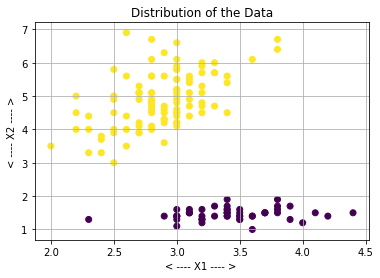

In [5]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.title('Distribution of the Data')
plt.xlabel('< ---- X1 ---- > ')
plt.ylabel('< ---- X2 ---- >')
plt.grid(True)
plt.show()

#### SVM Class

In [6]:
class supportVectorMachine:

    def __init__(self, learning_rate = 0.001, epochs = 10000):
        self.lr = learning_rate
        self.lambdaa = 0.001
        self.epochs = epochs

    
    def train_model(self, X_train, y_train):
        self.xtr = X_train
        y_ = np.where(y_train <= 0, -1, 1)
        self.ytr = y_
        self.weights = np.zeros(self.xtr.shape[1])
        self.bias = 0
        
        for _ in range(self.epochs):
            for idx, xi in enumerate(self.xtr):
                condition = self.ytr[idx] * (np.dot(xi, self.weights) - self.bias) >= 1
                if condition:
                    # only the regularizing term
                    self.weights -= self.lr * (2 * self.weights * self.lambdaa)
                else:
                    # weights and the regularizing term
                    self.weights -= self.lr * (2 * self.weights*self.lambdaa - np.dot(xi, self.ytr[idx]))
                    self.bias -= self.lr * self.ytr[idx]
        return self.weights, self.bias
            
        
    def predict(self, X_test):
        approx = np.dot(X_test, self.weights)
        approx = np.sign(approx)
        for i in range(len(approx)):
            if approx[i] == -1.:
                approx[i] = 0
            else:
                approx[i] = 1
        return approx
    
    def accuracy(self, a, b):
        assert len(a) == len(b)
        count = 0
        for i in range(len(a)):
            if int(a[i]) == int(b[i]):
                count+=1
        return count/len(a)*100

#### Train Test Split

In [7]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 0)

In [8]:
X_train.shape

(120, 2)

#### Training the Model and Predicting

In [9]:
model = supportVectorMachine()
weights, bias = model.train_model(X_train, y_train)

In [10]:
y_pred = model.predict(X_test)

#### Accuracy 

In [11]:
print('Accuracy : {:0.2f}'.format(model.accuracy(y_test, y_pred)))

Accuracy : 96.67


#### Weights and Bias

In [12]:
print('weights : {} and bias : {:0.3f}'.format(weights,bias))

weights : [-0.63268778  1.25321105] and bias : 1.176


#### Plotting the Graph

In [13]:
yfit1 = [ weights[0] * xi + weights[1] * xi  + bias + 1 for xi in X_test]
yfit2 = [ weights[0] * xi + weights[1] * xi  + bias  for xi in X_test]
yfit3 = [ weights[0] * xi + weights[1] * xi  + bias - 1  for xi in X_test]

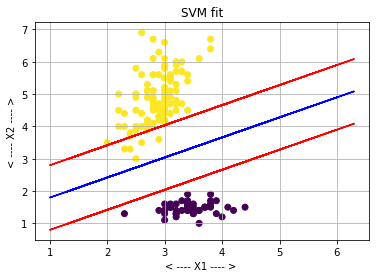

In [14]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test)
plt.plot(X_test, yfit1, c = 'red')
plt.plot(X_test, yfit2, c = 'blue')
plt.plot(X_test, yfit3, c = 'red')
plt.title('SVM fit')
plt.xlabel('< ---- X1 ---- > ')
plt.ylabel('< ---- X2 ---- >')
plt.grid(True)